In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sqlalchemy import create_engine
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

In [4]:
# uploading the dataset

db=pd.read_csv('movies.csv')
db.head(716)

,Unnamed: 0,Title,Studio_Abbreviation,Worldwide_Gross,Domestic_Gross,Domestic_Share,Overseas_Gross,Overseas_Share,Year_x,Genre,...,Director,Language,Plot,Poster,Production,Rated,Ratings,Released,Runtime,Writer
0,0,Avengers: Infinity War,BV,2048.4,678.8,33.1,1369.5,66.9,2018,"Action, Adventure, Sci-Fi",...,"Anthony Russo, Joe Russo",English,The Avengers and their allies must be willing ...,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Walt Disney Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",27 Apr 2018,149 min,"Christopher Markus (screenplay by), Stephen Mc..."
1,1,Black Panther,BV,1346.9,700.1,52.0,646.9,48.0,2018,"Action, Adventure, Sci-Fi",...,Ryan Coogler,"English, Swahili, Nama, Xhosa, Korean","T'Challa, heir to the hidden but advanced king...",https://m.media-amazon.com/images/M/MV5BMTg1MT...,Marvel Studios,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",16 Feb 2018,134 min,"Ryan Coogler, Joe Robert Cole, Stan Lee (based..."
2,2,Jurassic World: Fallen Kingdom,Uni.,1309.5,417.7,31.9,891.8,68.1,2018,"Action, Adventure, Sci-Fi",...,J.A. Bayona,"English, Russian",When the island's dormant volcano begins roari...,https://m.media-amazon.com/images/M/MV5BNzIxMj...,Universal Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",22 Jun 2018,128 min,"Derek Connolly, Colin Trevorrow, Michael Crich..."
3,3,Incredibles 2,BV,1242.8,608.6,49.0,634.2,51.0,2018,"Animation, Action, Adventure",...,Brad Bird,English,The Incredibles hero family takes on a new mis...,https://m.media-amazon.com/images/M/MV5BMTEzNz...,Disney/Pixar,PG,"[{'Source': 'Internet Movie Database', 'Value'...",15 Jun 2018,118 min,Brad Bird
4,4,Aquaman,WB,1146.9,334.8,29.2,812.1,70.8,2018,"Action, Adventure, Fantasy",...,James Wan,English,"Arthur Curry, the human-born heir to the under...",https://m.media-amazon.com/images/M/MV5BOTk5OD...,Warner Bros. Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",21 Dec 2018,143 min,David Leslie Johnson-McGoldrick (screenplay by...
5,5,Bohemian Rhapsody,Fox,889.3,216.0,24.3,673.4,75.7,2018,"Biography, Drama, Music",...,Bryan Singer,English,The story of the legendary rock band Queen and...,https://m.media-amazon.com/images/M/MV5BNDg2Nj...,20th Century Fox,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",02 Nov 2018,134 min,"Anthony McCarten (story by), Peter Morgan (sto..."
6,6,Mission: Impossible - Fallout,Par.,791.1,220.2,27.8,571.0,72.2,2018,"Action, Adventure, Thriller",...,Christopher McQuarrie,"English, French","Ethan Hunt and his IMF team, along with some f...",https://m.media-amazon.com/images/M/MV5BNjRlZm...,Paramount Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",27 Jul 2018,147 min,Bruce Geller (based on the television series c...
7,7,Deadpool 2,Fox,778.9,318.5,40.9,460.5,59.1,2018,"Action, Adventure, Comedy",...,David Leitch,"English, Cantonese, Spanish, Russian",Foul-mouthed mutant mercenary Wade Wilson (AKA...,https://m.media-amazon.com/images/M/MV5BNjk1Nj...,20th Century Fox,R,"[{'Source': 'Internet Movie Database', 'Value'...",18 May 2018,119 min,"Rhett Reese, Paul Wernick, Ryan Reynolds"
8,8,Fantastic Beasts: The Crimes of Grindelwald,WB,653.7,159.6,24.4,494.1,75.6,2018,"Adventure, Family, Fantasy",...,David Yates,"English, French","The second installment of the ""Fantastic Beast...",https://m.media-amazon.com/images/M/MV5BZjFiMG...,Warner Bros. Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",16 Nov 2018,134 min,"J.K. Rowling, J.K. Rowling (based upon charact..."
9,9,Ready Player One,WB,582.9,137.7,23.6,445.2,76.4,2018,"Action, Adventure, Sci-Fi",...,Steven Spielberg,English,When the creator of a virtual reality world ca...,https://m.media-amazon.com/images/M/MV5BY2JiYT...,Warner Bros. Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",29 Mar 2018,140 min,"Zak Penn (screenplay by), Ernest Cline (screen..."


# Loading data into SQLdatabase

In [29]:
# creating an engine and opening up a connection

conn = sqlite3.connect('movies.db')
c = conn.cursor()

In [30]:
# creating a table and loading into the database

#db.to_sql('movies_data', con=conn)

In [28]:
# checking if exists 

c.execute('''SELECT * FROM movies_data;''').fetchall()
pd.read_sql_query("select * from movies_data;", conn)


,index,Unnamed: 0,Title,Studio_Abbreviation,Worldwide_Gross,Domestic_Gross,Domestic_Share,Overseas_Gross,Overseas_Share,Year_x,...,Director,Language,Plot,Poster,Production,Rated,Ratings,Released,Runtime,Writer
0,0,0,Avengers: Infinity War,BV,2048.4,678.8,33.1,1369.5,66.9,2018,...,"Anthony Russo, Joe Russo",English,The Avengers and their allies must be willing ...,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Walt Disney Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",27 Apr 2018,149 min,"Christopher Markus (screenplay by), Stephen Mc..."
1,1,1,Black Panther,BV,1346.9,700.1,52.0,646.9,48.0,2018,...,Ryan Coogler,"English, Swahili, Nama, Xhosa, Korean","T'Challa, heir to the hidden but advanced king...",https://m.media-amazon.com/images/M/MV5BMTg1MT...,Marvel Studios,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",16 Feb 2018,134 min,"Ryan Coogler, Joe Robert Cole, Stan Lee (based..."
2,2,2,Jurassic World: Fallen Kingdom,Uni.,1309.5,417.7,31.9,891.8,68.1,2018,...,J.A. Bayona,"English, Russian",When the island's dormant volcano begins roari...,https://m.media-amazon.com/images/M/MV5BNzIxMj...,Universal Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",22 Jun 2018,128 min,"Derek Connolly, Colin Trevorrow, Michael Crich..."
3,3,3,Incredibles 2,BV,1242.8,608.6,49.0,634.2,51.0,2018,...,Brad Bird,English,The Incredibles hero family takes on a new mis...,https://m.media-amazon.com/images/M/MV5BMTEzNz...,Disney/Pixar,PG,"[{'Source': 'Internet Movie Database', 'Value'...",15 Jun 2018,118 min,Brad Bird
4,4,4,Aquaman,WB,1146.9,334.8,29.2,812.1,70.8,2018,...,James Wan,English,"Arthur Curry, the human-born heir to the under...",https://m.media-amazon.com/images/M/MV5BOTk5OD...,Warner Bros. Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",21 Dec 2018,143 min,David Leslie Johnson-McGoldrick (screenplay by...
5,5,5,Bohemian Rhapsody,Fox,889.3,216.0,24.3,673.4,75.7,2018,...,Bryan Singer,English,The story of the legendary rock band Queen and...,https://m.media-amazon.com/images/M/MV5BNDg2Nj...,20th Century Fox,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",02 Nov 2018,134 min,"Anthony McCarten (story by), Peter Morgan (sto..."
6,6,6,Mission: Impossible - Fallout,Par.,791.1,220.2,27.8,571.0,72.2,2018,...,Christopher McQuarrie,"English, French","Ethan Hunt and his IMF team, along with some f...",https://m.media-amazon.com/images/M/MV5BNjRlZm...,Paramount Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",27 Jul 2018,147 min,Bruce Geller (based on the television series c...
7,7,7,Deadpool 2,Fox,778.9,318.5,40.9,460.5,59.1,2018,...,David Leitch,"English, Cantonese, Spanish, Russian",Foul-mouthed mutant mercenary Wade Wilson (AKA...,https://m.media-amazon.com/images/M/MV5BNjk1Nj...,20th Century Fox,R,"[{'Source': 'Internet Movie Database', 'Value'...",18 May 2018,119 min,"Rhett Reese, Paul Wernick, Ryan Reynolds"
8,8,8,Fantastic Beasts: The Crimes of Grindelwald,WB,653.7,159.6,24.4,494.1,75.6,2018,...,David Yates,"English, French","The second installment of the ""Fantastic Beast...",https://m.media-amazon.com/images/M/MV5BZjFiMG...,Warner Bros. Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",16 Nov 2018,134 min,"J.K. Rowling, J.K. Rowling (based upon charact..."
9,9,9,Ready Player One,WB,582.9,137.7,23.6,445.2,76.4,2018,...,Steven Spielberg,English,When the creator of a virtual reality world ca...,https://m.media-amazon.com/images/M/MV5BY2JiYT...,Warner Bros. Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",29 Mar 2018,140 min,"Zak Penn (screenplay by), Ernest Cline (screen..."


In [ ]:
c.close
conn.close()

Done.

# Preparing for analysis

In [5]:
# dropping unwanted columns

db_clean=db.drop(columns=['Unnamed: 0', 'Poster'])
db_clean.head(716)

,Title,Studio_Abbreviation,Worldwide_Gross,Domestic_Gross,Domestic_Share,Overseas_Gross,Overseas_Share,Year_x,Genre,IMDB_Score,...,Country,Director,Language,Plot,Production,Rated,Ratings,Released,Runtime,Writer
0,Avengers: Infinity War,BV,2048.4,678.8,33.1,1369.5,66.9,2018,"Action, Adventure, Sci-Fi",8.5,...,USA,"Anthony Russo, Joe Russo",English,The Avengers and their allies must be willing ...,Walt Disney Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",27 Apr 2018,149 min,"Christopher Markus (screenplay by), Stephen Mc..."
1,Black Panther,BV,1346.9,700.1,52.0,646.9,48.0,2018,"Action, Adventure, Sci-Fi",7.3,...,USA,Ryan Coogler,"English, Swahili, Nama, Xhosa, Korean","T'Challa, heir to the hidden but advanced king...",Marvel Studios,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",16 Feb 2018,134 min,"Ryan Coogler, Joe Robert Cole, Stan Lee (based..."
2,Jurassic World: Fallen Kingdom,Uni.,1309.5,417.7,31.9,891.8,68.1,2018,"Action, Adventure, Sci-Fi",6.2,...,USA,J.A. Bayona,"English, Russian",When the island's dormant volcano begins roari...,Universal Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",22 Jun 2018,128 min,"Derek Connolly, Colin Trevorrow, Michael Crich..."
3,Incredibles 2,BV,1242.8,608.6,49.0,634.2,51.0,2018,"Animation, Action, Adventure",7.7,...,USA,Brad Bird,English,The Incredibles hero family takes on a new mis...,Disney/Pixar,PG,"[{'Source': 'Internet Movie Database', 'Value'...",15 Jun 2018,118 min,Brad Bird
4,Aquaman,WB,1146.9,334.8,29.2,812.1,70.8,2018,"Action, Adventure, Fantasy",7.2,...,"Australia, USA",James Wan,English,"Arthur Curry, the human-born heir to the under...",Warner Bros. Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",21 Dec 2018,143 min,David Leslie Johnson-McGoldrick (screenplay by...
5,Bohemian Rhapsody,Fox,889.3,216.0,24.3,673.4,75.7,2018,"Biography, Drama, Music",8.1,...,"UK, USA",Bryan Singer,English,The story of the legendary rock band Queen and...,20th Century Fox,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",02 Nov 2018,134 min,"Anthony McCarten (story by), Peter Morgan (sto..."
6,Mission: Impossible - Fallout,Par.,791.1,220.2,27.8,571.0,72.2,2018,"Action, Adventure, Thriller",7.8,...,"USA, China, France, Norway",Christopher McQuarrie,"English, French","Ethan Hunt and his IMF team, along with some f...",Paramount Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",27 Jul 2018,147 min,Bruce Geller (based on the television series c...
7,Deadpool 2,Fox,778.9,318.5,40.9,460.5,59.1,2018,"Action, Adventure, Comedy",7.8,...,USA,David Leitch,"English, Cantonese, Spanish, Russian",Foul-mouthed mutant mercenary Wade Wilson (AKA...,20th Century Fox,R,"[{'Source': 'Internet Movie Database', 'Value'...",18 May 2018,119 min,"Rhett Reese, Paul Wernick, Ryan Reynolds"
8,Fantastic Beasts: The Crimes of Grindelwald,WB,653.7,159.6,24.4,494.1,75.6,2018,"Adventure, Family, Fantasy",6.7,...,"UK, USA",David Yates,"English, French","The second installment of the ""Fantastic Beast...",Warner Bros. Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",16 Nov 2018,134 min,"J.K. Rowling, J.K. Rowling (based upon charact..."
9,Ready Player One,WB,582.9,137.7,23.6,445.2,76.4,2018,"Action, Adventure, Sci-Fi",7.5,...,USA,Steven Spielberg,English,When the creator of a virtual reality world ca...,Warner Bros. Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",29 Mar 2018,140 min,"Zak Penn (screenplay by), Ernest Cline (screen..."


In [45]:
# transforming str values into categories

db_clean.Studio_Abbreviation = db_clean.Studio_Abbreviation.astype('category')
db_clean.Genre = db_clean.Genre.astype('category')
db_clean.Subgenre1 = db_clean.Subgenre1.astype('category')
db_clean.Subgrene2 = db_clean.Subgrene2.astype('category')
db_clean.Subgrene3 = db_clean.Subgrene3.astype('category')
db_clean.Actors = db_clean.Actors.astype('category')
db_clean.Awards = db_clean.Awards.astype('category')
db_clean.Country = db_clean.Country.astype('category')
db_clean.Director = db_clean.Director.astype('category')
db_clean.Language = db_clean.Language.astype('category')
db_clean.Production = db_clean.Production.astype('category')
#db_clean.info()

Done.

In [ ]:
# # dropping duplicates
# print(movie_df.shape)
# movie_df=db_clean.drop_duplicates(keep='first')
# print(movie_df.shape)

In [ ]:
# # dropping all the rows with na in the columns mentioned above in the list.
# print(movie_df.shape)
# movies_df.dropna(subset=cols, inplace=True)
# print(movies_df.shape)

# EDA

In [100]:
# Q: What are the top movies by world revenue?
# sorting by revenue

db_sorted=db_clean.sort_values(by=['Worldwide_Gross'], ascending=False)
db_sorted.head()

# A: No surprises there.

,Title,Studio_Abbreviation,Worldwide_Gross,Domestic_Gross,Domestic_Share,Overseas_Gross,Overseas_Share,Year_x,Genre,IMDB_Score,...,Country,Director,Language,Plot,Production,Rated,Ratings,Released,Runtime,Writer
715,Avatar,Fox,2777.2,749.8,27.0,2027.5,73.0,2009,"Action, Adventure, Fantasy",7.8,...,"UK, USA",James Cameron,"English, Spanish",A paraplegic marine dispatched to the moon Pan...,20th Century Fox,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",18 Dec 2009,162 min,James Cameron
218,Star Wars: The Force Awakens,BV,2068.2,936.7,45.3,1131.6,54.7,2015,"Action, Adventure, Fantasy",8.0,...,USA,NaN,English,NaN,NaN,NaN,"[{'Source': 'Internet Movie Database', 'Value'...",14 Dec 2015,NaN,Scott Bromley
0,Avengers: Infinity War,BV,2048.4,678.8,33.1,1369.5,66.9,2018,"Action, Adventure, Sci-Fi",8.5,...,USA,"Anthony Russo, Joe Russo",English,The Avengers and their allies must be willing ...,Walt Disney Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",27 Apr 2018,149 min,"Christopher Markus (screenplay by), Stephen Mc..."
219,Jurassic World,Uni.,1671.7,652.3,39.0,1019.4,61.0,2015,"Action, Adventure, Sci-Fi",7.0,...,USA,Colin Trevorrow,English,"A new theme park, built on the original site o...",Universal Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",12 Jun 2015,124 min,"Rick Jaffa (screenplay by), Amanda Silver (scr..."
220,Furious 7,Uni.,1516.0,353.0,23.3,1163.0,76.7,2015,"Action, Crime, Thriller",7.2,...,"USA, China, Japan, Canada, United Arab Emirates",James Wan,"English, Thai, Arabic, Spanish",Deckard Shaw seeks revenge against Dominic Tor...,Universal Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",03 Apr 2015,137 min,"Chris Morgan, Gary Scott Thompson (characters)"


In [50]:
# Q: What are overall numerical stats for the data?
# a quick look at numeric values

db_sorted.describe().round(decimals=2)

# A: Max and mean of revenue vary a lot, signaling that there are outliers. Score, on the oteth hand, looks normal.

,Worldwide_Gross,Domestic_Gross,Domestic_Share,Overseas_Gross,Overseas_Share,Year_x,IMDB_Score,Metascore,Votes
count,789.00,789.00,789.00,780.00,789.00,789.00,789.00,789.00,789.00
mean,250.22,100.60,50.05,157.45,49.95,2013.32,6.55,54.52,188093.43
std,291.05,102.41,19.38,204.93,19.38,2.84,0.90,17.09,192886.82
min,24.80,10.10,5.60,1.00,0.00,2009.00,3.20,11.00,3037.00
25%,77.30,38.60,34.70,33.35,37.70,2011.00,6.00,41.00,65323.00
50%,140.30,63.90,47.90,76.25,52.10,2013.00,6.60,54.00,121801.00
75%,303.00,119.20,62.30,198.15,65.30,2016.00,7.20,66.00,235707.00
max,2777.20,936.70,100.00,2027.50,94.40,2018.00,8.80,100.00,1812491.00


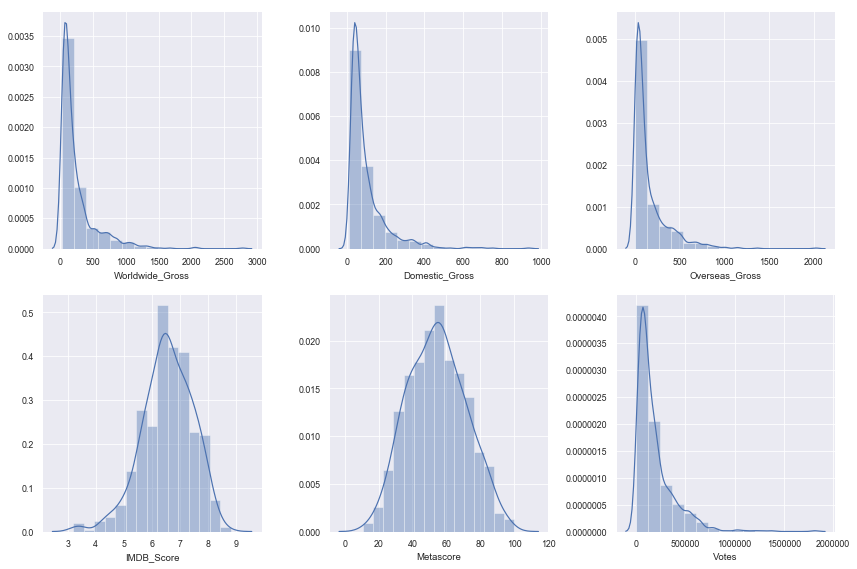

In [106]:
# Q: What are the distributions that describe revenue and reviews? 
# various distributions

fig, axes = plt.subplots(2, 3)
fig.set_size_inches(12, 8)

f1 = sns.distplot(db_sorted.Worldwide_Gross, bins=15, ax=axes[0, 0])
#f1.set(xscale="log", yscale="log")
f2 = sns.distplot(db_sorted.Domestic_Gross, bins=15, ax=axes[0, 1])
#f2.set(xscale="log", yscale="log")
f3 = sns.distplot(db_sorted.Overseas_Gross, bins=15, ax=axes[0, 2])
#f3.set(xscale="log", yscale="log")
f4 = sns.distplot(db_sorted.IMDB_Score, bins=15, ax=axes[1, 0])
f5 = sns.distplot(db_sorted.Metascore, bins=15, ax=axes[1, 1])
f6 = sns.distplot(db_sorted.Votes, bins=15, ax=axes[1, 2])

#plt.setp(axes, yticks=[])
plt.tight_layout()

# A: This plot is quite informative. There are obvious difference in how $ and revies are distributed.

plt.savefig("Distributions.png")

### By genre

In [99]:
# subsetting

genre1 = db_sorted[['Title', 'Worldwide_Gross', 'Domestic_Gross', 'Overseas_Gross', 'Subgenre1', 'IMDB_Score', 'Metascore', 'Year_x']]
genre2 = db_sorted[['Title', 'Worldwide_Gross', 'Domestic_Gross', 'Overseas_Gross', 'Subgrene2', 'IMDB_Score', 'Metascore', 'Year_x']]
genre3 = db_sorted[['Title', 'Worldwide_Gross', 'Domestic_Gross', 'Overseas_Gross', 'Subgrene3', 'IMDB_Score', 'Metascore', 'Year_x']]
#genre1.info()

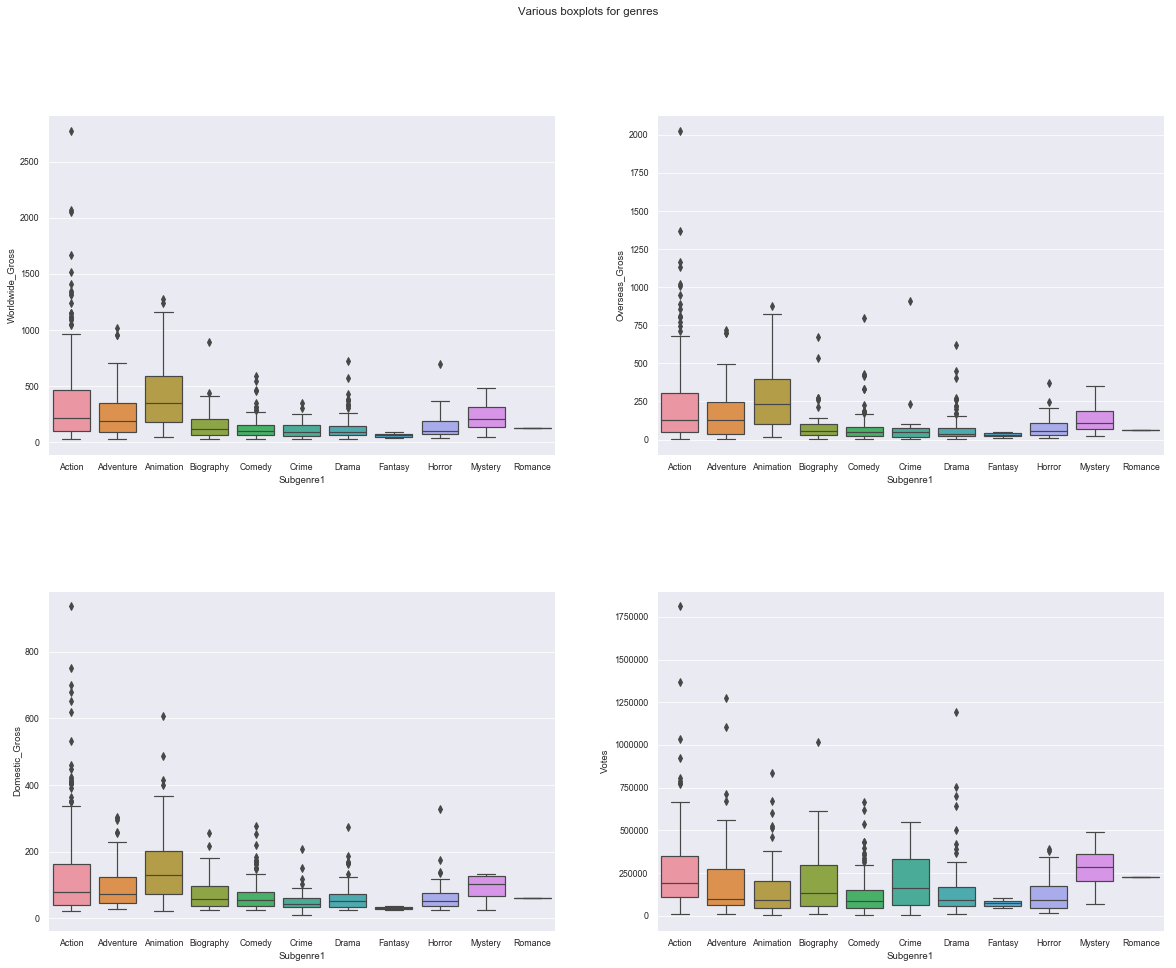

In [77]:
# Q: What are the general measures of central tendency look like for each genre and are there any outliers?
# various boxplots for genres

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(20, 15)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

sns.boxplot(data=genre1, x='Subgenre1', y='Worldwide_Gross', ax=axes[0, 0])
sns.boxplot(data=genre1, x='Subgenre1', y='Overseas_Gross', ax=axes[0, 1])
sns.boxplot(data=genre1, x='Subgenre1', y='Domestic_Gross', ax=axes[1, 0])
sns.boxplot(data=db_clean, x='Subgenre1', y='Votes', ax=axes[1, 1])

plt.suptitle('Various boxplots for genres')

plt.show()

# A: Quite a few outliers and means are anchored twards bottom.  Low mean values and high variances in the random variables

### In order to choose which genre to concider the primary one, we look if there are differences in mean revenue for each subgenre:

In [53]:
# mean revenue by genre 1

mean_revenue_by_genre=genre1[['Subgenre1', 'Worldwide_Gross', 'Overseas_Gross', 'Domestic_Gross']]
mean_revenue_by_genre.groupby('Subgenre1').mean().round(decimals=2)

# Observations: For all three categories, animation leads in revenue, followed by action and adventure. However, since there are outliers, it might be more meaningful to llok at the meadina values.

,Worldwide_Gross,Overseas_Gross,Domestic_Gross
Subgenre1,,,
Action,351.36,223.88,130.10
Adventure,272.93,183.05,99.29
Animation,438.15,280.76,157.39
Biography,155.15,92.50,76.02
Comedy,122.22,68.36,65.97
Crime,109.75,85.40,58.67
Drama,131.50,76.51,64.07
Fantasy,63.10,32.20,30.85
Horror,152.72,83.48,69.25


In [82]:
# Median
mean_revenue_by_genre.groupby('Subgenre1').median().round(decimals=2)

,Worldwide_Gross,Overseas_Gross,Domestic_Gross
Subgenre1,,,
Action,215.00,130.60,78.35
Adventure,191.65,127.90,73.00
Animation,351.30,231.00,130.20
Biography,116.45,56.55,58.20
Comedy,96.10,46.40,54.00
Crime,87.80,52.75,43.30
Drama,89.50,39.50,52.40
Fantasy,63.10,32.20,30.85
Horror,99.45,56.15,52.10


In [54]:
# mean revenue by genre 2

mean_revenue_by_genre2=genre2[['Subgrene2', 'Worldwide_Gross', 'Overseas_Gross', 'Domestic_Gross']]
mean_revenue_by_genre2.groupby('Subgrene2').mean().round(decimals=2)

,Worldwide_Gross,Overseas_Gross,Domestic_Gross
Subgrene2,,,
Action,496.43,325.77,170.66
Adventure,487.13,314.75,174.86
Biography,218.65,79.62,139.00
Comedy,158.21,86.97,75.52
Crime,173.10,106.53,66.57
Drama,148.22,96.30,71.33
Family,199.23,119.90,79.32
Fantasy,180.93,114.12,66.81
History,171.55,95.45,76.10


In [55]:
# mean revenue by genre 3

mean_revenue_by_genre3=genre3[['Subgrene3', 'Worldwide_Gross', 'Overseas_Gross', 'Domestic_Gross']]
mean_revenue_by_genre3.groupby('Subgrene3').mean().round(decimals=2)

,Worldwide_Gross,Overseas_Gross,Domestic_Gross
Subgrene3,,,
Adventure,528.51,350.85,177.66
Biography,228.93,148.90,80.00
Comedy,419.89,265.59,154.31
Crime,165.80,80.65,85.15
Drama,157.40,97.51,67.65
Family,229.68,152.48,94.51
Fantasy,488.00,323.26,171.62
History,175.72,90.21,85.51
Horror,153.78,156.71,57.74


### Results are overal lconsistent actoss all three subgenre. For analytical purposes, we adopt subgenre1 as the primary genre for each movie

In [56]:
# Q: What are the avarage critics' score and viewers review for each genre?
# mean reviews by genre
mean_reviews_by_genre=genre1[['Subgenre1', 'Metascore', 'IMDB_Score']]
mean_reviews_by_genre.groupby('Subgenre1').mean().round(decimals=2)

# A: Biopics hold the lead in terms of scores followed by crime and, surprisingly, romance movies in terms pf metascore. Same goes for IMDB score.

,Metascore,IMDB_Score
Subgenre1,,
Action,52.15,6.56
Adventure,56.94,6.51
Animation,58.16,6.68
Biography,68.87,7.34
Comedy,50.25,6.20
Crime,62.48,7.08
Drama,56.23,6.67
Fantasy,42.50,5.55
Horror,48.28,5.88


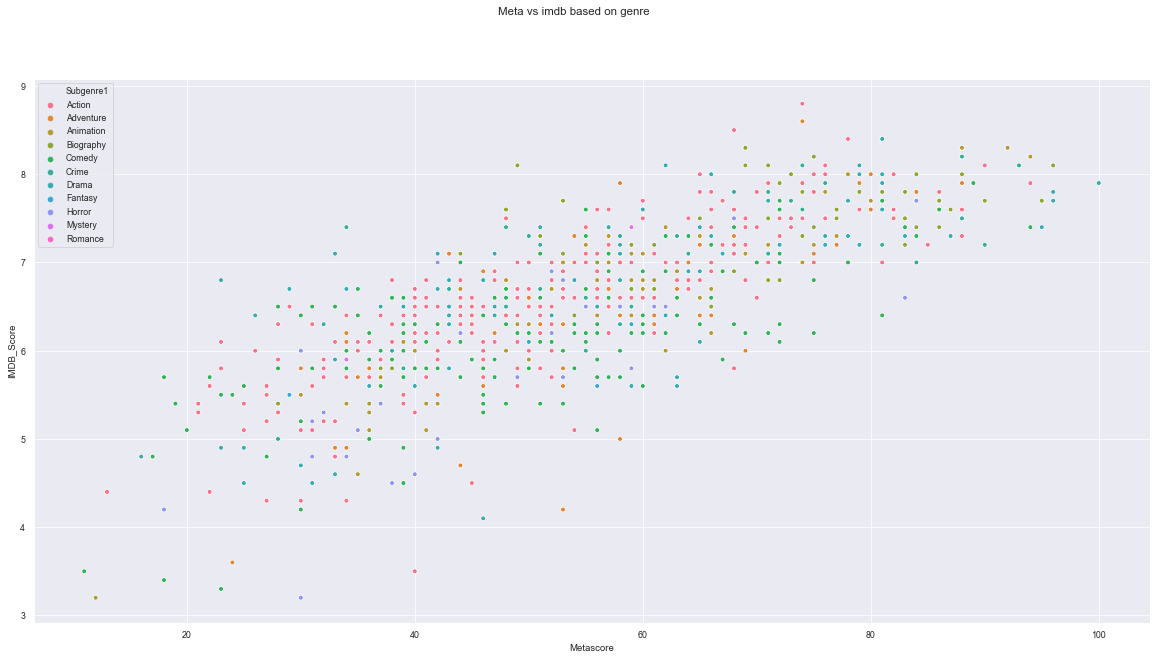

In [119]:
# Q: What is the relationship between the scores given the genre?
#  meta vs imdb based on genre

plt.subplots(figsize=(20,10))
sns.scatterplot(data=ratings, x=ratings['Metascore'], y=ratings['IMDB_Score'], hue='Subgenre1')
plt.suptitle('Meta vs imdb based on genre')
plt.savefig("Meta vs imdb based on genre.png")

# A: prevelance of red and blue. Horrow is clustered in lower scores and some in the centre. Animation has a cluster in the higher scores. Overall, quite distributed.

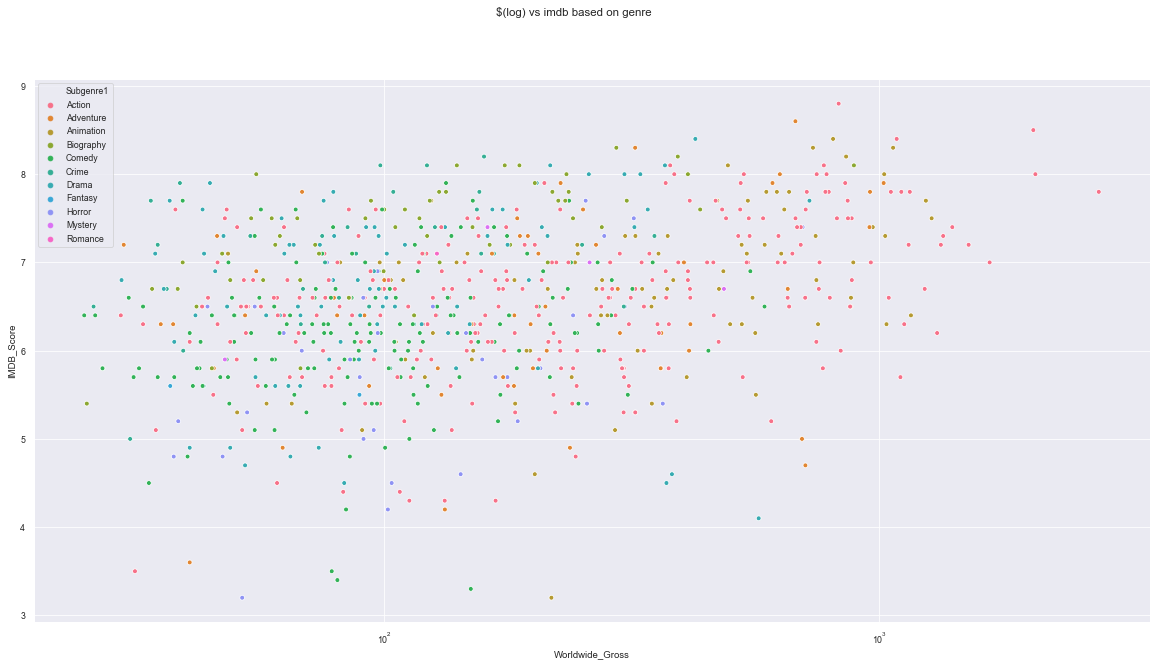

In [123]:
# Q: What is the relationship between $ and the scores given genre?
#  meta vs imdb based on genre

plt.subplots(figsize=(20,10))
f0=sns.scatterplot(data=ratings, x=ratings['Worldwide_Gross'], y=ratings['IMDB_Score'], hue='Subgenre1')
f0.set(xscale="log")
plt.suptitle('$(log) vs imdb based on genre')
plt.savefig("$(log) vs imdb based on genre.png")

# A: Majority of movies do not make that much $. Those who do, are mainly action and animation.

Text(0.5, 0.98, '$ vs imdb based on genre')

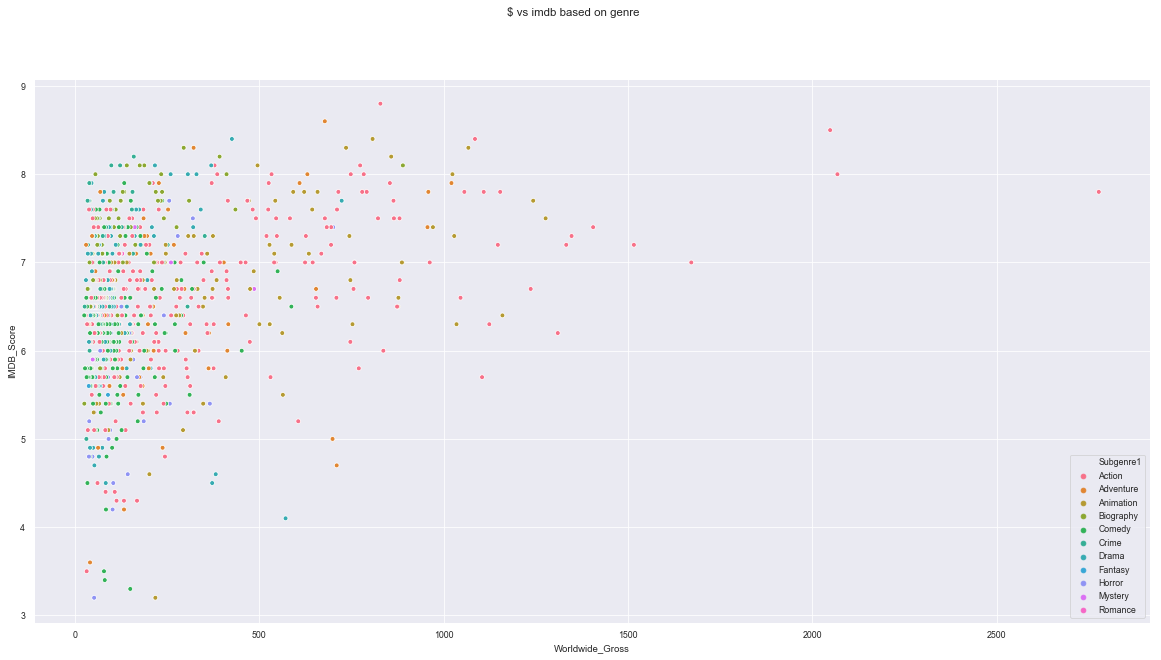

In [121]:
# not logged (logged is better)

plt.subplots(figsize=(20,10))
sns.scatterplot(data=ratings, x=ratings['Worldwide_Gross'], y=ratings['IMDB_Score'], hue='Subgenre1')

plt.suptitle('$ vs imdb based on genre')
#plt.savefig("$ vs imdb based on genre.png")

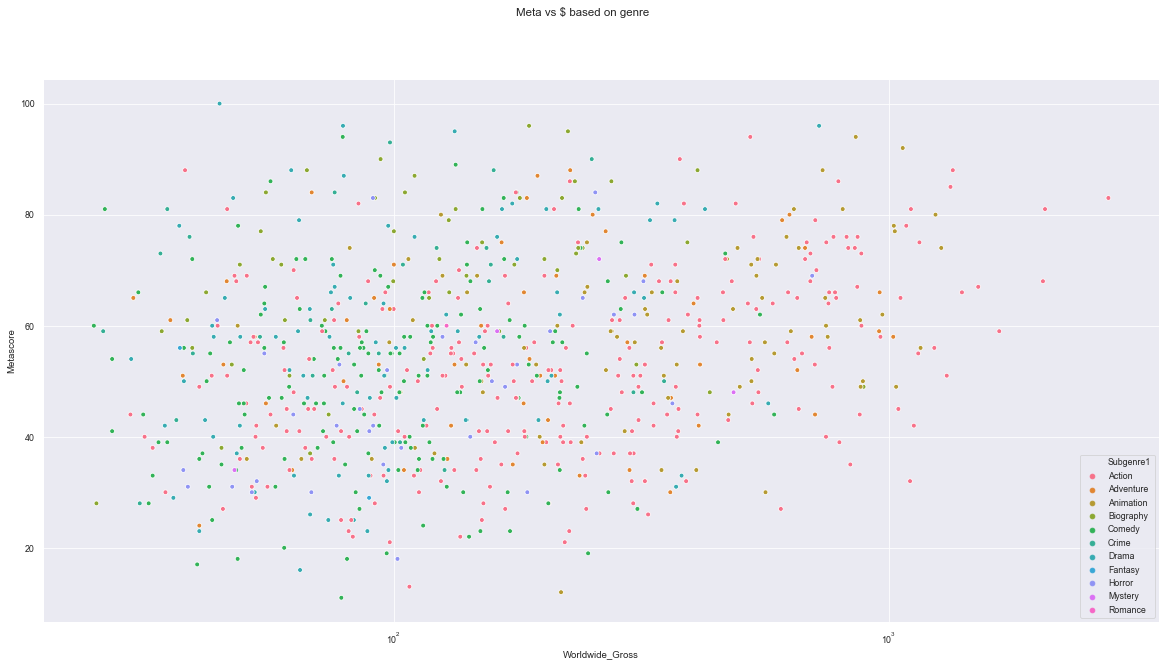

In [118]:
# Q: What is the relationship between $ and the scores given genre?
#  meta vs imdb based on genre

plt.subplots(figsize=(20,10))
f5=sns.scatterplot(data=ratings, x=ratings['Worldwide_Gross'], y=ratings['Metascore'], hue='Subgenre1')
f5.set(xscale="log")
plt.suptitle('Meta vs $ based on genre')
plt.savefig("$ vs meta based on genre.png")

# A: Similar to the previous resluts.

Text(0.5, 0.98, 'Revenue timeseries based on ganre')

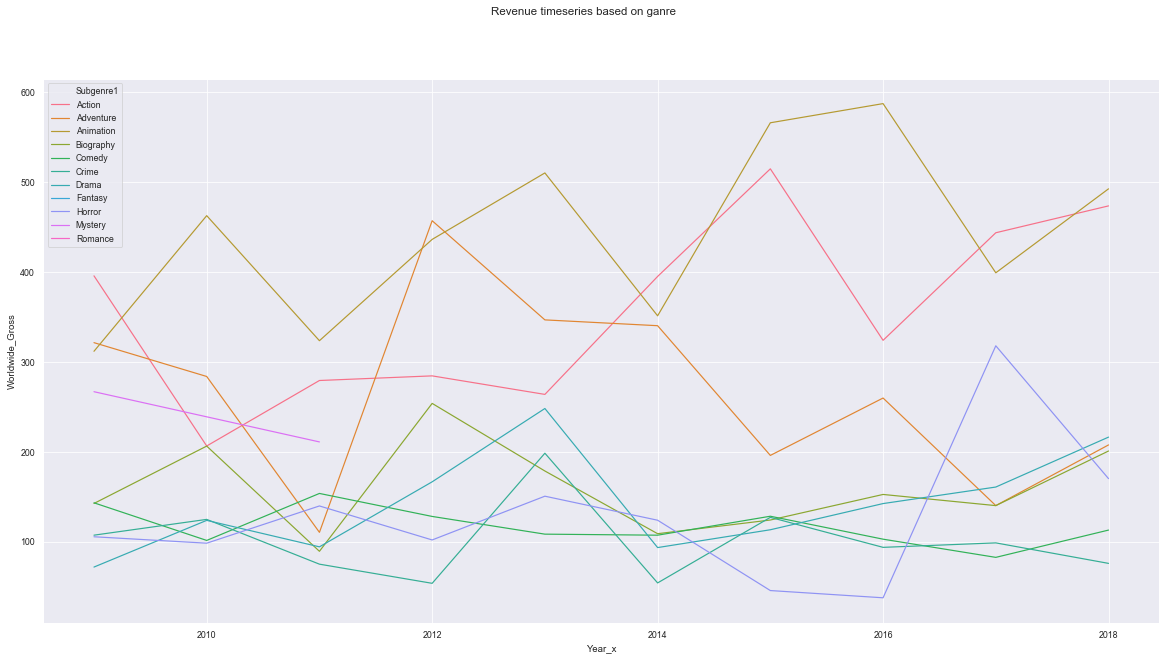

In [116]:
# Q: Are there any trends for each genre in regard to world revenue?
# plotting revenue timeseries based on the ganre

plt.close("all")
sns.set_context("paper")
plt.subplots(figsize=(20,10))
timeseries=sns.lineplot(x="Year_x", y="Worldwide_Gross", hue="Subgenre1", ci=None, data=genre1)
plt.savefig("timeseries1.png")
plt.suptitle('Revenue timeseries based on ganre')

# A: ANimation and action are on the rise. Horror is not. Advanture is slightly coming up after quie a fall, while other genres appear to be stable. 

Text(0.5, 0.98, 'Metareviews timeseries based on ganre')

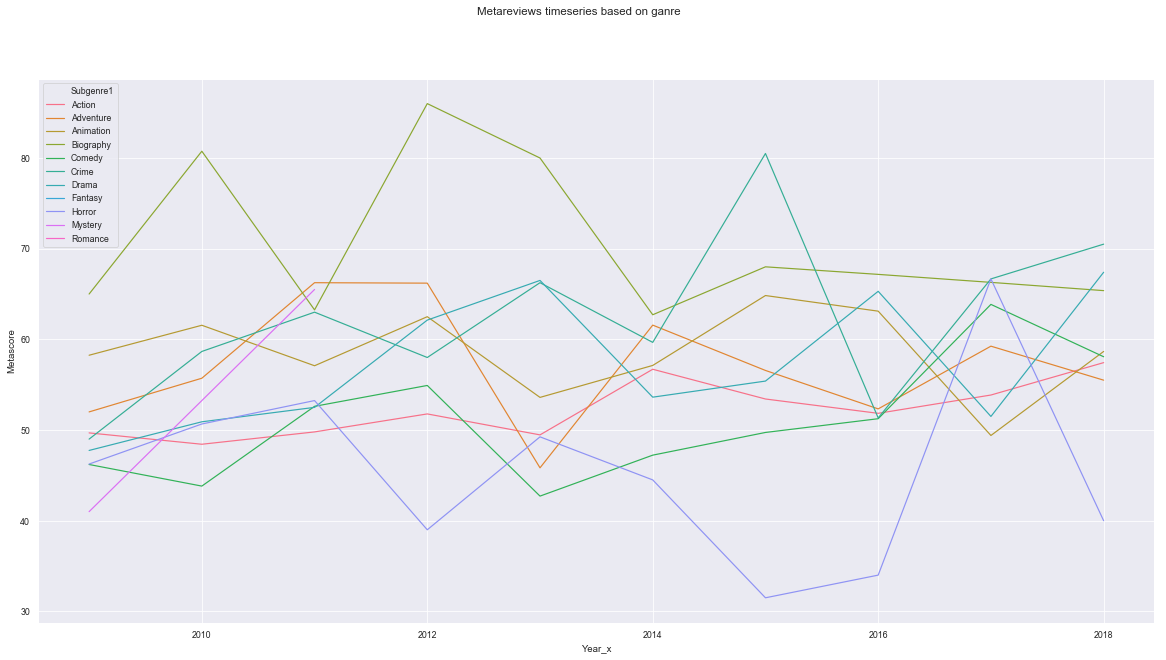

In [73]:
# Q: What are the trends in critics' score given each genre?
# plotting metareviews timeseries based on the ganre

plt.close("all")
sns.set_context("paper")
plt.subplots(figsize=(20,10))
timeseries=sns.lineplot(x="Year_x", y="Metascore", hue="Subgenre1", ci=None, data=genre1)
plt.savefig("timeseries2.png")
plt.suptitle('Metareviews timeseries based on ganre')

# A: Horror is not popular w critics.

Text(0.5, 0.98, 'IMDB_score timeseries based on ganre')

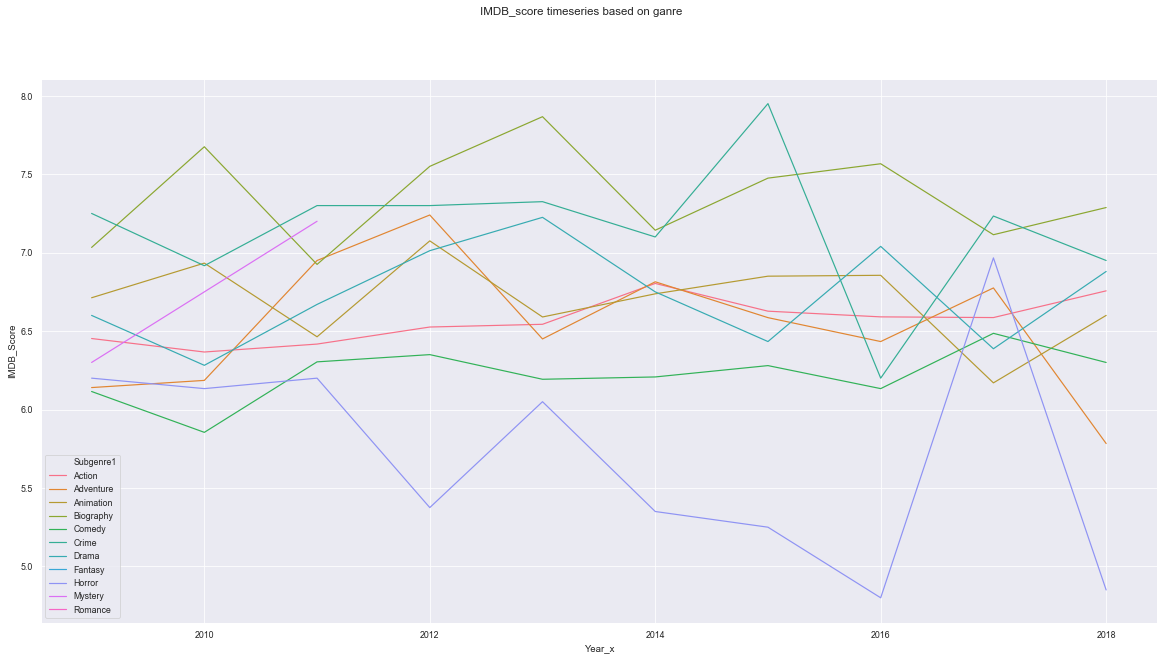

In [72]:
# Q: What are the trends in viewers' score given each genre?
# plotting IMDB_reviews timeseries based on the ganre

plt.close("all")
sns.set_context("paper")
plt.subplots(figsize=(20,10))
timeseries=sns.lineplot(x="Year_x", y="IMDB_Score", hue="Subgenre1", ci=None, data=genre1)
plt.savefig("timeseries3.png")
plt.suptitle('IMDB_score timeseries based on ganre')

# A: People like horrow less too.

## Ratings

In [61]:
# subsetting
ratings = db_sorted[['Title', 'Worldwide_Gross', 'Domestic_Gross', 'Overseas_Gross', 'IMDB_Score', 'Metascore', 'Year_x', 'Subgenre1']]
ratings.head()

,Title,Worldwide_Gross,Domestic_Gross,Overseas_Gross,IMDB_Score,Metascore,Year_x,Subgenre1
715,Avatar,2777.2,749.8,2027.5,7.8,83,2009,Action
218,Star Wars: The Force Awakens,2068.2,936.7,1131.6,8.0,81,2015,Action
0,Avengers: Infinity War,2048.4,678.8,1369.5,8.5,68,2018,Action
219,Jurassic World,1671.7,652.3,1019.4,7.0,59,2015,Action
220,Furious 7,1516.0,353.0,1163.0,7.2,67,2015,Action


In [62]:
# Q: Whate are the general relationship between various numeric variables?
# correlation between the two scores

ratings.corr().round(decimals=2)

,Worldwide_Gross,Domestic_Gross,Overseas_Gross,IMDB_Score,Metascore,Year_x
Worldwide_Gross,1.00,0.93,0.94,0.31,0.25,0.11
Domestic_Gross,0.93,1.00,0.80,0.34,0.31,0.09
Overseas_Gross,0.94,0.80,1.00,0.26,0.20,0.12
IMDB_Score,0.31,0.34,0.26,1.00,0.77,0.07
Metascore,0.25,0.31,0.20,0.77,1.00,0.12
Year_x,0.11,0.09,0.12,0.07,0.12,1.00


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


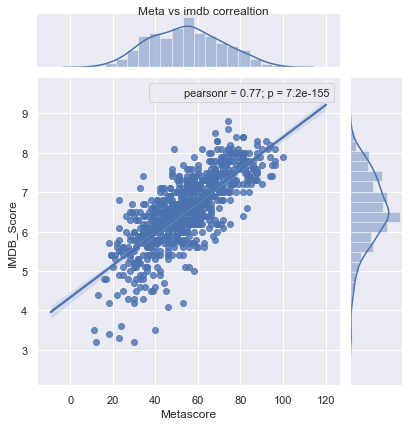

In [131]:
# Q: Is there a relationship between two differnet scores?
# correaltion meta vs imdb

r1 = sns.jointplot(data=ratings, x=ratings['Metascore'], y=ratings['IMDB_Score'], kind="reg")
r1.annotate(stats.pearsonr)
plt.suptitle('Meta vs imdb correaltion')

# A: String correlation here.

plt.savefig("Reviews corr.png")

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


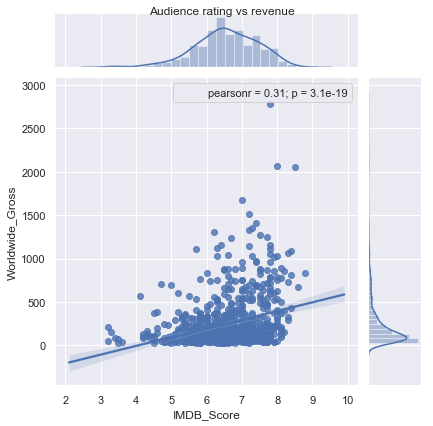

In [130]:
# Q: Is there a relationship between viewrs score and revenue?
# audience rating vs revenue

r2 = sns.jointplot(data=ratings, x=ratings['IMDB_Score'], y=ratings['Worldwide_Gross'], kind="reg")
r2.annotate(stats.pearsonr)
plt.suptitle('Audience rating vs revenue')

# A: Surprisingly, thouhg positive but not very strong correlation. Prob becuase of distribution.

plt.savefig("$ vs rev.png")

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


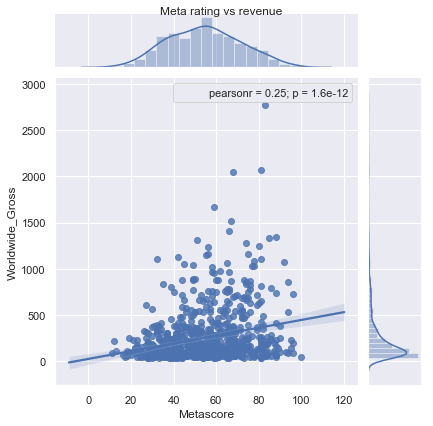

In [129]:
# Q: Is there a relationship between critics' score and revenue?
# critics rating vs revenue

r3 = sns.jointplot(data=ratings, x=ratings['Metascore'], y=ratings['Worldwide_Gross'], kind="reg")
r3.annotate(stats.pearsonr)
plt.suptitle('Meta rating vs revenue')

# A: Similar as previous.

plt.savefig("$ vs rev 2.png")

In [44]:
# pulling unique genre values from subgenre columns
genre1 = list(db_clean['Subgenre1'].unique())
genre2 = list(db_clean['Subgrene2'].unique())
genre3 = list(db_clean['Subgrene3'].unique())
# combining
genres = genre1 + genre2 + genre3
# removing nan value
genres = [g for g in genres if str(g)!= 'nan']
# removing spaces
unique_genres = []
for g in genres:
    x = g.strip()
    unique_genres.append(x)
# getting true unique genre list
unique_genres = list(set(unique_genres))
unique_genres
# finding mean worldwide gross by genre
genre_mean_gross = []
for u in unique_genres:
    x = db_clean[db_clean['Genre'].str.contains(u)]['Worldwide_Gross'].mean()
    genre_mean_gross.append(x)
genre_mean_gross
g = {'Genre': unique_genres, 'Average_Gross': genre_mean_gross}
gdf = pd.DataFrame(g)
gdf.head()

,Genre,Average_Gross
0,Family,215.787719
1,Music,153.063158
2,Sci-Fi,476.611765
3,Crime,154.445946
4,Musical,194.633333


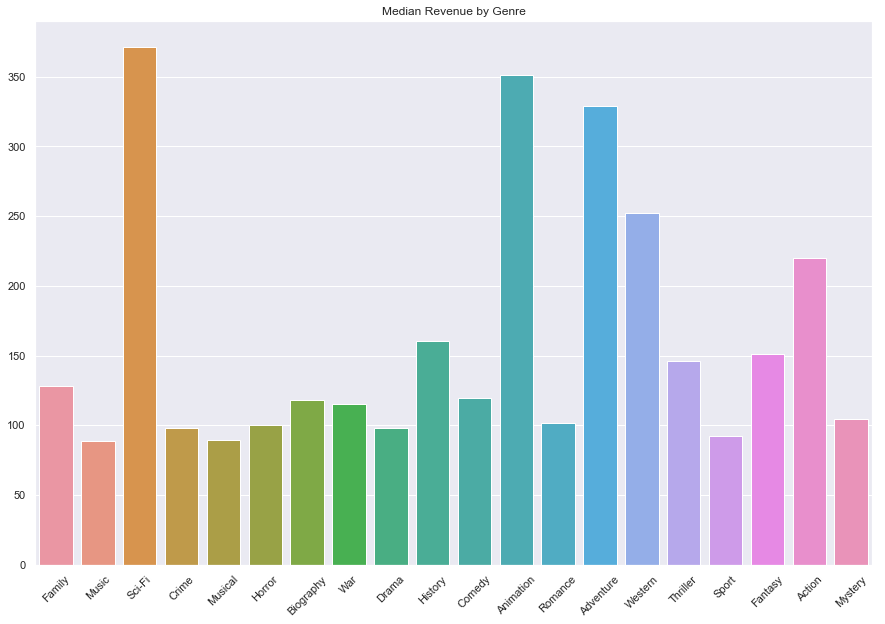

In [115]:
# same thing but using median instead. 
genre_median_gross = []
for u in unique_genres:
    x = db_clean[db_clean['Genre'].str.contains(u)]['Worldwide_Gross'].median()
    genre_median_gross.append(x)
plt.subplots(figsize=(15,10))
genre_med_graph = sns.barplot(x=unique_genres, y=genre_median_gross)
for item in genre_med_graph.get_xticklabels():
    item.set_rotation(45)
genre_med_graph.set_title('Median Revenue by Genre')
plt.savefig('median revenue by genre')


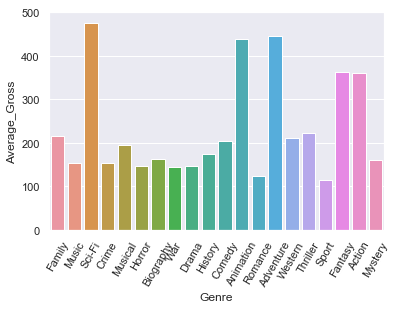

In [62]:
# mean which we chose not to use
gdf_graph = sns.barplot(x=gdf['Genre'], y=gdf['Average_Gross'])
for item in gdf_graph.get_xticklabels():
    item.set_rotation(60)

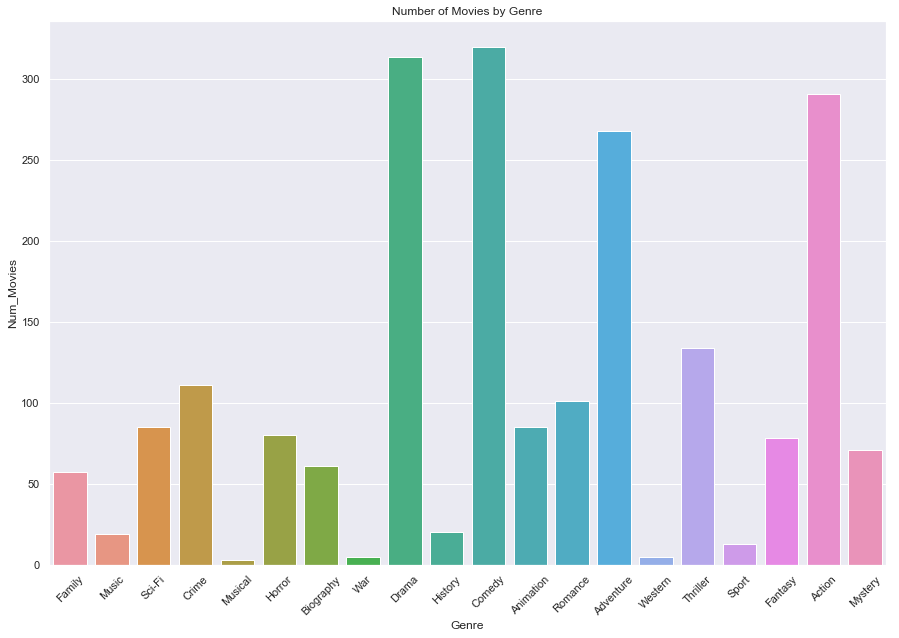

In [112]:
# view of genre counts to clarify above chart
genre_counts = []
for u in unique_genres:
    x = len(db_clean[db_clean['Genre'].str.contains(u)])
    genre_counts.append(x)
gc = {'Genre': unique_genres, 'Num_Movies': genre_counts}
gcdf = pd.DataFrame(gc)
plt.subplots(figsize=(15,10))
gcdf_graph = sns.barplot(x=gcdf['Genre'], y=gcdf['Num_Movies'])
for item in gcdf_graph.get_xticklabels():
    item.set_rotation(45)
gcdf_graph.set_title('Number of Movies by Genre')
plt.savefig('number of movies by genre')

In [100]:
# experimenting with looking at metacritic score by genre by year. didn't get there in the end unfortunately
new_ratings = db_clean[['Title', 'Worldwide_Gross', 'Domestic_Gross', 'Overseas_Gross', 'IMDB_Score', 'Metascore', 'Year_x', 'Genre']]
new_ratings.head()
metascore_genre_year = {}
for u in unique_genres:
    x = new_ratings[new_ratings['Genre'].str.contains(u)].groupby('Year_x')['Metascore'].mean()
    metascore_genre_year.update({u:x})
metascore_genre_year

{'Family': Year_x
 2009    46.285714
 2010    45.000000
 2011    58.111111
 2012    53.142857
 2013    45.500000
 2014    53.500000
 2015    54.250000
 2016    50.750000
 2017    66.000000
 2018    62.500000
 Name: Metascore, dtype: float64, 'Music': Year_x
 2009    61.333333
 2010    48.333333
 2012    50.000000
 2014    50.000000
 2015    61.500000
 2016    72.000000
 2017    42.000000
 2018    49.000000
 Name: Metascore, dtype: float64, 'Sci-Fi': Year_x
 2009    48.300000
 2010    61.250000
 2011    56.600000
 2012    54.833333
 2013    63.181818
 2014    58.916667
 2015    57.900000
 2016    58.000000
 2017    54.142857
 2018    62.428571
 Name: Metascore, dtype: float64, 'Crime': Year_x
 2009    58.250000
 2010    53.384615
 2011    50.666667
 2012    58.714286
 2013    52.533333
 2014    52.384615
 2015    57.363636
 2016    58.272727
 2017    66.666667
 2018    59.250000
 Name: Metascore, dtype: float64, 'Musical': Year_x
 2010    47
 2012    47
 2017    48
 Name: Metascore, dty

In [8]:
db_clean[db_clean['Genre'].str.contains('Action')]['Worldwide_Gross'].mean()

360.82989690721655

In [68]:
len(db_clean[db_clean['Genre'].str.contains('Action')])

291

In [ ]:
# Recommendations:
# - diversify across more popular genres 
# - horror is not looking giood
# - animation is looking good
# - do not optimise for making a huge hit -- does not happen often
# - preferential lattachment can explain revenue distribution
# - a long-tailed distribution requires non-independence, often in the form of positive feedbacks.
# - higher revenue abroad - export!